In [73]:
import pandas as pd
import os, geopandas as gpd


In [74]:
data = pd.read_csv("elecciones_22.csv")


In [75]:
data

,Region,Provincia,Distrito,Ubigeo,Votosemitidos,N_Partidos,P_ausentismo,Año,Utilidad
0,AMAZONAS,CHACHAPOYAS,ASUNCION,10102,267.0,2.0,0.392647,2022,288968.85
1,AMAZONAS,CHACHAPOYAS,BALSAS,10103,538.0,4.0,0.127044,2022,73168.08
2,AMAZONAS,CHACHAPOYAS,CHETO,10104,514.0,3.0,0.266046,2022,-48417.01
3,AMAZONAS,CHACHAPOYAS,CHILIQUIN,10105,587.0,5.0,0.146935,2022,-32934.94
4,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,10106,971.0,5.0,0.119410,2022,-2842610.91
...,...,...,...,...,...,...,...,...,...
1651,UCAYALI,PADRE ABAD,NESHUYA,250204,4317.0,6.0,0.120671,2022,332205.89
1652,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,250205,2780.0,6.0,0.115577,2022,623546.31
1653,UCAYALI,ATALAYA,TAHUANIA,250302,2468.0,6.0,0.057638,2022,4282895.88
1654,UCAYALI,ATALAYA,YURUA,250303,672.0,6.0,0.077634,2022,185593.67


In [76]:
distritos=gpd.read_file(os.path.join("C:/Users/Nicolas Silva/Documents/GitHub/Dashboard/Distrital/DISTRITOS_inei_geogpsperu_suyopomalia.shp"))


In [77]:
distritos.head()

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,MUJERES__3,HOMBRES_NA,HOMBRES__2,TOTAL_NACI,IND_121951,IND_122042,IND_122047,IND_516462,IND_516484,geometry
0,100902,1.0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,CODO DEL POZUZO,7768.0,5022.0,4329.0,2.338322,...,96.0,53.846154,112.0,208.0,37.0,11868.28878,9469.69031,75000.0,730.0,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,2.790716,...,63.0,51.908397,68.0,131.0,35.0,7746.84703,6279.18003,13500.0,1236.0,"POLYGON ((-75.20831 -9.10175, -75.20805 -9.101..."
2,250305,3.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,6085.0,4172.0,3616.0,31.892034,...,40.0,50.617284,41.0,81.0,53.0,3892.91357,3316.87044,43950.0,540.0,"POLYGON ((-74.95635 -8.79148, -74.95612 -8.792..."
3,250302,4.0,UCAYALI,PADRE ABAD,IRAZOLA,SAN ALEJANDRO,10941.0,7308.0,6368.0,10.952719,...,156.0,52.000000,169.0,325.0,176.0,11690.84202,11225.28471,125760.0,1366.0,"POLYGON ((-75.10843 -8.7999, -75.11753 -8.8120..."
4,250304,5.0,UCAYALI,PADRE ABAD,NESHUYA,MONTE ALEGRE,9003.0,5983.0,5058.0,15.535539,...,0.0,0.000000,0.0,0.0,60.0,7432.20148,6834.75852,237441.0,691.0,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


<Axes: >

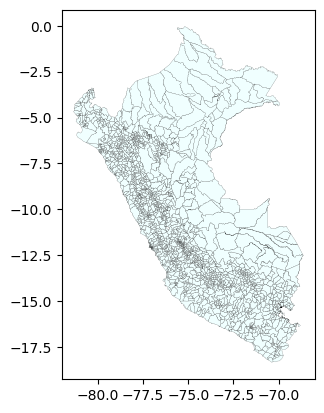

In [78]:
distritos.plot(facecolor="azure",
               edgecolor='black', 
               linewidth=0.1)

In [79]:
ausentes = pd.read_csv("elecciones_22.csv")

In [80]:
ausentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         1656 non-null   object 
 1   Provincia      1656 non-null   object 
 2   Distrito       1656 non-null   object 
 3   Ubigeo         1656 non-null   int64  
 4   Votosemitidos  1656 non-null   float64
 5   N_Partidos     1656 non-null   float64
 6   P_ausentismo   1656 non-null   float64
 7   Año            1656 non-null   int64  
 8   Utilidad       1656 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 116.6+ KB


In [81]:
# Filtrar por nivel de ausentismo que no sea "Alto"
data_sin_ausentismo_alto = ausentes[ausentes['nivel_ausentismo'] != '3_Alto']

# Mostrar las primeras filas del nuevo DataFrame
data_sin_ausentismo_alto.head()


KeyError: 'nivel_ausentismo'

In [ ]:
indexList=['Año','Provincia','Distrito','nivel_ausentismo']
aggregator = {'P_ausentismo': 'mean'}
ausentismo_a=data_sin_ausentismo_alto.groupby(indexList,observed=True).agg(aggregator)
ausentismo_a

P_ausentismo
Año  Provincia Distrito     nivel_ausentismo              
2022 ABANCAY   CHACOCHE     2_Alerta              0.243438
               CIRCA        1_Bajo                0.132854
               CURAHUASI    1_Bajo                0.114385
               HUANIPACA    1_Bajo                0.108960
               LAMBRAMA     1_Bajo                0.107853
...                                                    ...
     YUNGUYO   TINICACHI    1_Bajo                0.169106
               UNICACHI     1_Bajo                0.161311
     ZARUMILLA AGUAS VERDES 1_Bajo                0.133149
               MATAPALO     2_Alerta              0.256682
               PAPAYAL      1_Bajo                0.191134

[1618 rows x 1 columns]

In [ ]:
onlyDistrito=set(distritos.NOMBDIST) - set(ausentes.Distrito)
onlyAusentes=set(ausentes.Distrito) - set(distritos.NOMBDIST)

In [ ]:
len(onlyDistrito), len(onlyAusentes)

(180, 25)

In [ ]:
# Definir un umbral mínimo de similitud
umbral_similitud = 90

# Obtener las mejores coincidencias con el umbral aplicado
resultados_filtrados = [
    (dis, mejor_coincidencia, puntaje)
    for dis in sorted(onlyDistrito)
    for mejor_coincidencia, puntaje in [process.extractOne(dis, onlyAusentes, scorer=fuzz.ratio)]
    if puntaje >= umbral_similitud
]

# Mostrar los resultados filtrados
for original, coincidencia, puntaje in resultados_filtrados:
    print(f"{original} -> {coincidencia} (Similitud: {puntaje})")

ANCO_HUALLO -> ANCO-HUALLO (Similitud: 100.0)
CARMEN DE LA LEGUA REYNOSO -> CARMEN DE LA LEGUA-REYNOSO (Similitud: 100.0)
ESTIQUE-PAMPA -> ESTIQUE PAMPA (Similitud: 100.0)
HUAYLLAY GRANDE -> HUALLAY-GRANDE (Similitud: 96.55172413793103)
MILPUC -> MILPUCC (Similitud: 92.3076923076923)
RINCONADA LLICUAR -> RINCONADA-LLICUAR (Similitud: 100.0)
SAN JUAN DE ISCOS -> SAN JUAN DE YSCOS (Similitud: 94.11764705882352)
SANTA RITA DE SIGUAS -> SANTA RITA DE SIHUAS (Similitud: 95.0)
TOMAY KICHWA -> TOMAY-KICHWA (Similitud: 100.0)


In [ ]:
from thefuzz import process

# Filtrar solo coincidencias con similitud >= 90
changesinDF = {
    dis: process.extractOne(dis, onlyDistrito, scorer=process.default_scorer, score_cutoff=90)[0]
    for dis in sorted(onlyAusentes)
    if process.extractOne(dis, onlyDistrito, scorer=process.default_scorer, score_cutoff=90)
}

print(changesinDF)


{'ANCO-HUALLO': 'ANCO_HUALLO', 'CARMEN DE LA LEGUA-REYNOSO': 'CARMEN DE LA LEGUA REYNOSO', 'ESTIQUE PAMPA': 'ESTIQUE-PAMPA', 'HUALLAY-GRANDE': 'HUAYLLAY GRANDE', 'MARISCAL GAMARRA': 'GAMARRA', 'MILPUCC': 'MILPUC', 'QUISQUI': 'QUISQUI (KICHKI)', 'RINCONADA-LLICUAR': 'RINCONADA LLICUAR', 'SAN JUAN DE YSCOS': 'SAN JUAN DE ISCOS', 'SANTA RITA DE SIHUAS': 'SANTA RITA DE SIGUAS', 'TOMAY-KICHWA': 'TOMAY KICHWA'}


In [ ]:
# Aplicar los cambios detectados en changesinDF a la columna del dataframe
for old_value, new_value in changesinDF.items():
    distritos.loc[distritos['NOMBDIST'] == old_value, 'NOMBDIST'] = new_value


In [ ]:
data_final.head()

,UBIGEO,OBJECTID,NOMBDEP,NOMBPROV,NOMBDIST,CAPITAL,POBTOTAL,POB_EDAD_T,POB_EDAD_E,DENSIDAD,...,geometry,Region,Provincia,Distrito,Ubigeo,Votosemitidos,N_Partidos,P_ausentismo,Año,nivel_ausentismo
0,100902,1.0,HUANUCO,PUERTO INCA,CODO DEL POZUZO,CODO DEL POZUZO,7768.0,5022.0,4329.0,2.338322,...,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",HUANUCO,PUERTO INCA,CODO DEL POZUZO,90803,3590.0,5.0,0.123558,2022,1_Bajo
1,100904,2.0,HUANUCO,PUERTO INCA,TOURNAVISTA,TOURNAVISTA,6219.0,4162.0,3577.0,2.790716,...,"POLYGON ((-75.20831 -9.10175, -75.20805 -9.101...",HUANUCO,PUERTO INCA,TOURNAVISTA,90804,2438.0,7.0,0.076932,2022,1_Bajo
2,250305,3.0,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,6085.0,4172.0,3616.0,31.892034,...,"POLYGON ((-74.95635 -8.79148, -74.95612 -8.792...",UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,250205,2780.0,6.0,0.115577,2022,1_Bajo
3,250302,4.0,UCAYALI,PADRE ABAD,IRAZOLA,SAN ALEJANDRO,10941.0,7308.0,6368.0,10.952719,...,"POLYGON ((-75.10843 -8.7999, -75.11753 -8.8120...",UCAYALI,PADRE ABAD,IRAZOLA,250202,6265.0,8.0,0.073884,2022,1_Bajo
4,250304,5.0,UCAYALI,PADRE ABAD,NESHUYA,MONTE ALEGRE,9003.0,5983.0,5058.0,15.535539,...,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",UCAYALI,PADRE ABAD,NESHUYA,250204,4317.0,6.0,0.120671,2022,1_Bajo
